# Using Random Forest and RGB+ texture(ASM,Entropy,Contrast) as features  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as img
from sklearn.svm import SVC
from skimage import feature
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
import imageio

%matplotlib inline 

In [2]:
import imageio
composite_image = imageio.volread("composite.tif")
labeled_image = imageio.imread("labelling.png")
asm = imageio.volread("asm.tif")
contra= imageio.volread("contra.tif")
entropy = imageio.volread("entropy.tif")


/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Users/palash/ML1/env/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/Use

In [3]:
asm = asm.__array__()
contra = contra.__array__()
entropy = entropy.__array__()
print(asm.shape,contra.shape,entropy.shape)

(6823, 8643) (6823, 8643) (6823, 8643)


In [4]:
composite_image = composite_image.__array__()
#print(labeled_list)
composite_list = composite_image.reshape((labeled_image.shape[0] * labeled_image.shape[1], 4))
composite_list = pd.DataFrame(composite_list,index=None,columns=['r','g','b','alpha'])


In [5]:
labeled_list = labeled_image.__array__()
#print(labeled_list)

labeled_image_as_list = labeled_image.reshape((labeled_image.shape[0] * labeled_image.shape[1], 4))
labeled_list = pd.DataFrame(labeled_image_as_list,index=None,columns=['r','g','b','alpha'])
#print(labeled_list)

In [6]:
print(composite_list.shape,labeled_list.shape)

(58971189, 4) (58971189, 4)


In [7]:
asm_list = asm.reshape((labeled_image.shape[0] * labeled_image.shape[1]))
asm_list = pd.DataFrame(asm_list,index=None,columns=['asm'])
asm_list.describe()

,asm
count,5.897119e+07
mean,3.575296e-01
std,4.729010e-01
min,6.411718e-04
25%,1.402952e-03
50%,1.100725e-02
75%,1.000000e+00
max,1.000000e+00


In [8]:
contra_list = contra.reshape((labeled_image.shape[0] * labeled_image.shape[1]))
contra_list = pd.DataFrame(contra_list,index=None,columns=['contra'])
contra_list.describe()

,contra
count,5.897119e+07
mean,6.304033e+01
std,1.029775e+02
min,0.000000e+00
25%,0.000000e+00
50%,1.019916e+01
75%,9.259074e+01
max,1.935102e+03


In [9]:
entropy_list = entropy.reshape((labeled_image.shape[0] * labeled_image.shape[1]))
entropy_list = pd.DataFrame(entropy_list,index=None,columns=['entropy'])
entropy_list.describe()

,entropy
count,5.897119e+07
mean,5.664972e+00
std,4.372978e+00
min,-0.000000e+00
25%,-0.000000e+00
50%,7.174876e+00
75%,9.778625e+00
max,1.067208e+01


In [10]:
cred = np.asarray(composite_list['r'])
cgreen = np.asarray(composite_list['g'])
cblue = np.asarray(composite_list['b'])




labels=np.zeros(58971189)

labels=labels.astype(int)
print(labels)

image_labeled = np.column_stack((labeled_list,labels))
image_labeled

image_labeled = pd.DataFrame(image_labeled,index=None,columns=['r','g','b','alpha','labels'])


red = np.asarray(image_labeled['r'])
green = np.asarray(image_labeled['g'])
blue = np.asarray(image_labeled['b'])
labels  = np.asarray(image_labeled['labels'])





[0 0 0 ..., 0 0 0]


In [11]:
for i in range(image_labeled.shape[0]):
    if (i%10000000)==0:
        print(i)
    if red[i]==255 and green[i] ==255 and blue[i]==0:
        labels[i]=1
    elif red[i]==0 and green[i] ==255 and blue[i]==63:
        labels[i]=2
    elif red[i]==0 and green[i] ==128 and blue[i]==255:
        labels[i]=3
    elif red[i]==191 and green[i] ==0 and blue[i]==255:
        labels[i]=4
    elif red[i]==255 and green[i] ==0 and blue[i]==1:  
        labels[i]=5
    
        



composite_labeled = np.column_stack((cred,cgreen,cblue,labels))

composite_labeled

0
10000000
20000000
30000000
40000000
50000000


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [12]:
import collections
collections.Counter(labels)

Counter({0: 50089315,
         1: 1926412,
         2: 1287349,
         3: 1874309,
         4: 1958070,
         5: 1835734})

In [13]:
asm = np.asarray(asm_list)
contra = np.asarray(contra_list)
entropy = np.asarray(entropy_list)
combined_text = np.column_stack((red,green,blue,cred,cgreen,cblue,asm,contra,entropy,labels))

combined_text = pd.DataFrame(combined_text,columns=['r','g','b','cr','cg','cb','asm','contra','entropy','l'],dtype='uint8')

In [14]:
combined_text = combined_text[combined_text.l != 0]

combined_text = pd.DataFrame(combined_text,dtype='float64')
combined_text = combined_text.replace([np.inf, -np.inf],np.nan)
combined_text['asm']=combined_text['asm'].fillna(0.4)
combined_text['contra']= combined_text['contra'].fillna(47)
combined_text['entropy']=combined_text['entropy'].fillna(2.1)

In [15]:
X = combined_text[['cr','cg','cb','asm','contra','entropy']]
y= combined_text['l']
X.shape,y.shape

((8881874, 6), (8881874,))

In [16]:
from sklearn.model_selection import train_test_split 
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier(n_jobs=2)
model=rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Accuracy

In [19]:
 from sklearn.metrics import accuracy_score 
 accuracy = accuracy_score(y_test, predictions)
 print(accuracy) 

0.883332629653


In [20]:
original = np.column_stack((cred,cgreen,cblue,asm,contra,entropy))

In [21]:
original = pd.DataFrame(original,dtype='float64')
original = original.replace([np.inf, -np.inf],np.nan)
original[3]=original[3].fillna(0.4)
original[4]= original[4].fillna(47)
original[5]=original[5].fillna(2.1)

In [57]:
predictions = rf.predict(original)

predictions=predictions.reshape((6823, 8643))

forest = '#1f4424'
plantation = '#0ae1f2'
fallow_land = '#f7af7a'
grass = '#2bdf61'

nodata='#ffffff'






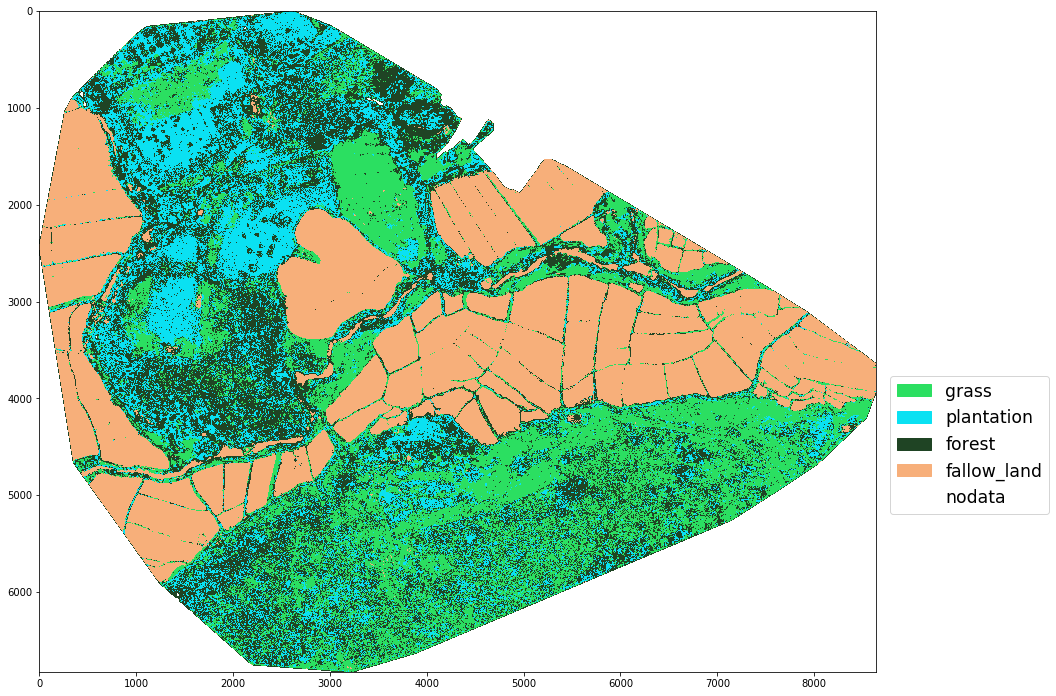

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors, legend, patches
fig_size= plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"]=fig_size


cm = np.array([grass,plantation,forest,fallow_land,nodata])
cmap = colors.ListedColormap(cm)


plt.imshow(predictions,cmap=cmap)

labels = ["grass","plantation","forest","fallow_land","nodata"]
    
## create patches as legend
patches =[patches.Patch(color=c,label=l) for c,l in zip(cm,labels)]


plt.legend(handles=patches, loc=4, borderaxespad=-10.0, bbox_to_anchor=(1, 0.5),fontsize='xx-large')

#plt.legend(handles=["grass","plantation","forest","trees","fallow_land"])
#plt.colorbar(cmap=cmap ,ticks=["grass","plantation","forest","trees","fallow_land"])
plt.show()

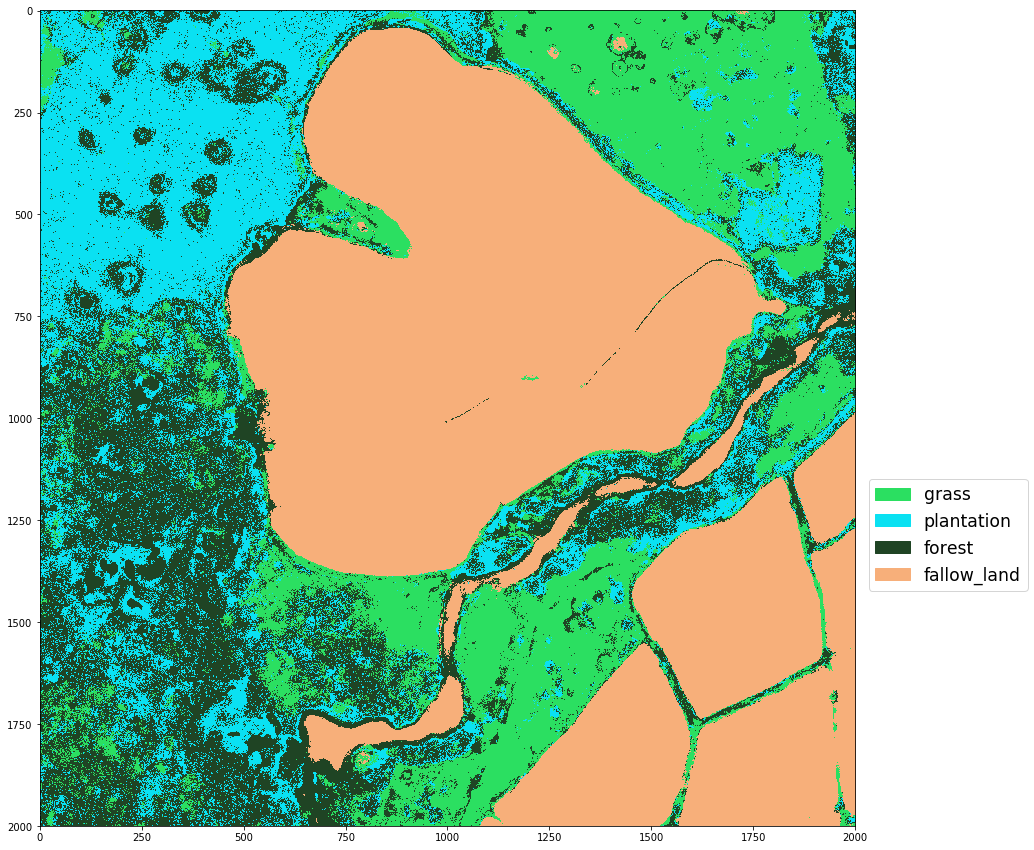

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors, legend, patches
fig_size= plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.rcParams["figure.figsize"]=fig_size


cm = np.array([grass,plantation,forest,fallow_land])
cmap = colors.ListedColormap(cm)


plt.imshow(predictions[2000:4000,2000:4000],cmap=cmap)

labels = ["grass","plantation","forest","fallow_land"]
    
## create patches as legend
patches =[patches.Patch(color=c,label=l) for c,l in zip(cm,labels)]


plt.legend(handles=patches, loc=4, borderaxespad=-10.0, bbox_to_anchor=(1, 0.5),fontsize='xx-large')

#plt.legend(handles=["grass","plantation","forest","trees","fallow_land"])
#plt.colorbar(cmap=cmap ,ticks=["grass","plantation","forest","trees","fallow_land"])
plt.show()

In [42]:
predictions = pd.DataFrame(predictions)

In [43]:
predictions.to_pickle('RGB_texture_rf13.pkl')

In [44]:
pred_rgb = pd.read_pickle('RGB_rf.pkl')
pred_text= predictions




In [45]:
result = np.copy(np.asarray(predictions).astype('uint8'))
result[:]=0

In [46]:
pred_rgb = np.asarray(pred_rgb).astype('uint8')
pred_text = np.asarray(pred_text).astype('uint8')

In [47]:
for i in range(pred_rgb.shape[0]):
    for j in range(pred_rgb.shape[1]):
        if(pred_rgb[i][j])!=(pred_text[i][j]):
            result[i][j]=1
            
            

In [48]:
result = pd.DataFrame(result)

In [49]:
result.to_pickle('diff13.pkl')

In [50]:
result.shape

(6823, 8643)

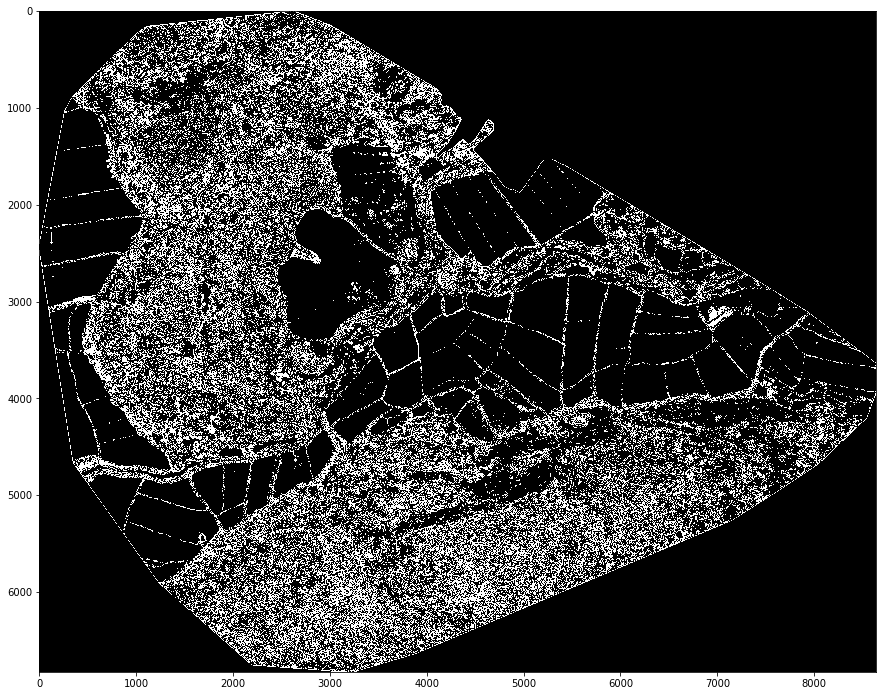

In [51]:
plt.imshow(result,cmap='gray')
plt.show()

In [52]:
predictions= pd.read_pickle('RGB_texture_rf13.pkl')


In [53]:
predictions.shape

(6823, 8643)

In [ ]:
6823* 8643